<a href="https://colab.research.google.com/github/ManoelEric1212/IC2_022/blob/main/Trabalho_01_IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

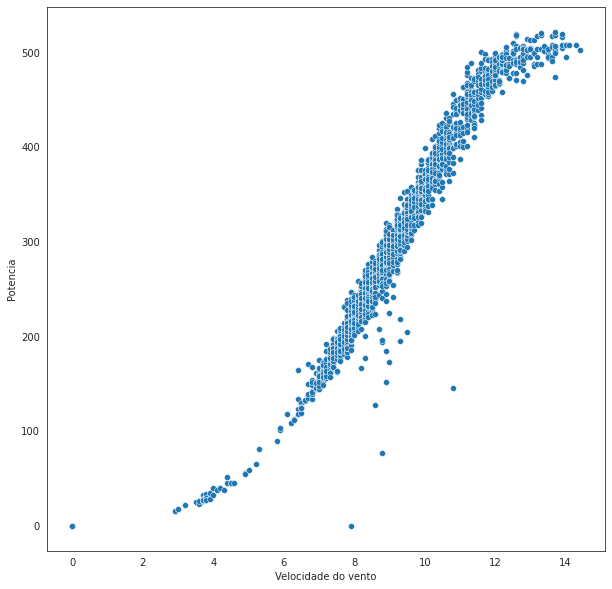

In [2]:
#Importação das bibliotecas pertinentes
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

'''Parte 1 '''

#Lendo os dados do arquivo
dataBase = pd.read_csv('aerogerador.dat', sep='\t',header=None)
Size = len(dataBase[0]) #Define o tamanho da amostra
#Cria um dicionário com apenas os dados de vel e pot
dicionario = {
    'Velocidade do vento': dataBase[0],
    'Potencia': dataBase[1]
}
new_dataBase = pd.DataFrame(dicionario)

#Plotagem dos dados de dispersão
sns.set_style("white")
plt.figure(figsize=(10, 10))
# Gráfico de Dispersão
g = sns.scatterplot(x="Velocidade do vento", y="Potencia", 
                    data=new_dataBase)
plt.show()



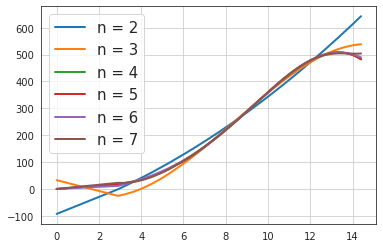

In [3]:
'''Parte 2 '''

#Redefinindo as variáveis dependente e independente
x = dataBase[0]
y = dataBase[1]
#Definindo a função que calcula a regressão polinomial

def Polynomial_regression(x,y,n):   
    X = np.ones(Size)                
    for i in range(1,n+1):
        X = np.c_[X, x**i]
    indices = ((np.linalg.inv(X.T@X))@X.T)@y
    return indices
#Aplicando a função de regressão para ordem 2 a 7

R2_armaz = [] # vetor vazio para incremento de cada R2 de n 
R2adj_armaz = [] # vetor vazio para incremento de cada R2_adj de n 
for k in range(2,7+1):                      
    B = Polynomial_regression(x,y,k)
    y_pred = B[0]
    for i in range(1,k+1):
        y_pred += B[i] * x**i   

    # Métricas de avaliação:
    SQE = ((y - y_pred)**2).sum()
    Syy = ((y - y.mean())**2).sum()
    R2   = 1 - SQE/Syy # Calcula R2
    R2_adj = 1 - (SQE/(Size - k - 1))/(Syy/(Size-1)) # Calcula R2_adj
    plt.plot(x,y_pred,lw=2, label = 'n = %i' %k)  
    R2_armaz.append(R2) # Armazenando os R2 de cada coeficiente
    R2adj_armaz.append(R2_adj) # Armazenando os R2_adj de cada coeficiente

plt.legend(fontsize=15)
plt.grid()
plt.show()


Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'R2')

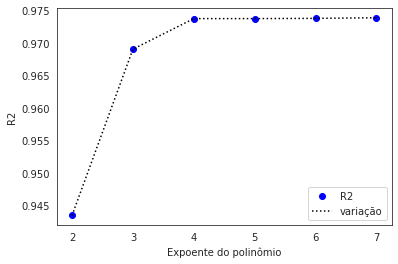

In [4]:
'''Parte 3 '''
%pylab inline
#Plot do R2 para cada expoente
x_r2 = [2,3,4,5,6,7]
y_r2 = R2_armaz
pylab.plot(x_r2, y_r2, 'bo', label='R2')
pylab.plot(x_r2, y_r2, ':k', label='variação')
pylab.legend()
pylab.xlabel('Expoente do polinômio')
pylab.ylabel('R2')




Text(0, 0.5, 'R2_adj')

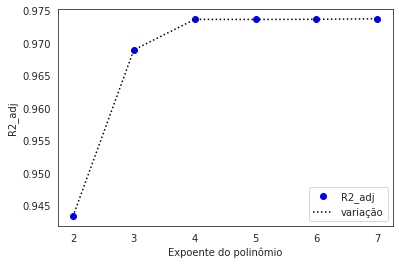

In [5]:
'''Parte 4 '''
#Plot do R2_adj para cada expoente
x_r2adj = [2,3,4,5,6,7]
y_r2adj = R2adj_armaz
pylab.plot(x_r2adj, y_r2adj, 'bo', label='R2_adj')
pylab.plot(x_r2adj, y_r2adj, ':k', label='variação')
pylab.legend()
pylab.xlabel('Expoente do polinômio')
pylab.ylabel('R2_adj')



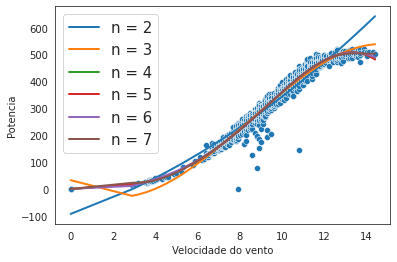

In [6]:
'''Parte 5 '''

#Plota os dados de dispersão
g = sns.scatterplot(x="Velocidade do vento", y="Potencia", 
                    data=new_dataBase)
for k in range(2,7+1):                      
    B = Polynomial_regression(x,y,k)
    y_pred = B[0]
    for i in range(1,k+1):
        y_pred += B[i] * x**i   

    # Métricas de avaliação:
    SQE = ((y - y_pred)**2).sum()
    Syy = ((y - y.mean())**2).sum()
    R2   = 1 - SQE/Syy # Calcula R2
    R2_adj = 1 - (SQE/(Size - k - 1))/(Syy/(Size-1)) # Calcula R2_adj
    plt.plot(x,y_pred,lw=2, label = 'n = %i' %k)  
    R2_armaz.append(R2) # Armazenando os R2 de cada coeficiente
    R2adj_armaz.append(R2_adj) # Armazenando os R2_adj de cada coeficiente

plt.legend(fontsize=15)

plt.show() 